In [7]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 
from pylab import imread
from skimage.color import rgb2gray

In [8]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
  # Convert ImageData and LabelData to List
  from matplotlib import pyplot as plt
  ImageArray = list(ImageData)
  LabelArray = list(LabelData)
  if(rows == 1 & cols == 1):
    fig = plt.figure(figsize=(20,20))
  else:
    fig = plt.figure(figsize=(cols*8,rows*5))
        
  for i in range(1, cols * rows + 1):
      fig.add_subplot(rows, cols, i)
      image = ImageArray[i - 1]
      # If the channel number is less than 3, we display as grayscale image
      # otherwise, we display as color image
      if (len(image.shape) < 3):
          plt.imshow(image, plt.cm.gray)
          plt.grid(gridType)
      else:
          plt.imshow(image)
          plt.grid(gridType)
      plt.title(LabelArray[i - 1])
  plt.show()

def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

In [9]:
# Đọc ảnh
image = cv2.imread("special.jpg", cv2.IMREAD_UNCHANGED)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Lấy kích thước ảnh
(h, w) = image_gray.shape
print(h, w)

1080 810


In [10]:
# Tạo nền theo kích thước được cho
height, width = h, w
image_bg = Image.new('RGB', (width, height), color='white')

# Tạo đối tượng ImageDraw
draw = ImageDraw.Draw(image_bg)

# Chọn font chữ và kích thước kèm văn bản muốn chèn vào hình
font_size = 46
font = ImageFont.truetype("arial.ttf", size = font_size)
#text = "Cty digi-texx"
#text = "test font"
text = "hóa rạ"

# Tính toán bounding box của văn bản
bbox = draw.textbbox((0, 0), text, font=font)
text_width = bbox[2] - bbox[0]
text_height = bbox[3] - bbox[1]

# Tính toán vị trí để văn bản nằm giữa hình ảnh
image_width, image_height = image_bg.size
x = (image_width - text_width) // 2
y = (image_height - text_height) // 2

# Vẽ văn bản vào hình ảnh
draw.text((x, y), text, font=font, fill=(0, 0, 0))

# Hiển thị hình ảnh
# image_bg.show()
image_bg.save("sample.png")

# Đọc ảnh và chuyển sang ảnh xám
image = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_color = cv2.imread('sample.png')

all_contours = np.vstack(contours)

# Bounding box hình chữ nhật nghiêng cho toàn bộ các contours
rect = cv2.minAreaRect(all_contours)
box = cv2.boxPoints(rect)
box = np.int32(box)

cv2.drawContours(image_color, [box], 0, (0, 255, 0), 2)
cv2.imwrite('sample.png', image_color)

True

In [11]:
print(box[0])
print(box[1])
print(box[2])
print(box[3])
x0, y0 = box [0]
x2, y2 = box [2]
width = bbox[2] - bbox[0]
height = bbox[3] - bbox[1]
print(x0, y0, x2, y2)
print(width, height)

[339 559]
[342 524]
[468 533]
[466 568]
339 559 468 533
132 42


đọc hình nền mới

In [12]:
# Đọc ảnh
image_bg = cv2.imread("special.jpg", cv2.IMREAD_UNCHANGED)

339 519 132 42


True

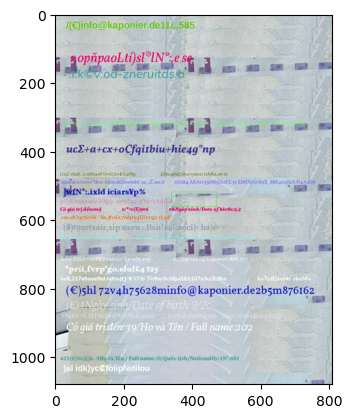

In [13]:
# Giả sử tọa độ và kích thước của bounding box
# x, y, width, height = 100, 100, 200, 150  # Tọa độ và kích thước bounding box
# Vẽ bounding box lên hình nền
box_color = (0, 255, 0)  
thickness = 1  

# Vẽ hình chữ nhật (bounding box) lên hình nền
cv2.rectangle(image_bg, (x, y), (x + width, y + height), box_color, thickness)

print(x,y, width, height)

# Hiển thị hình ảnh kết quả
plt.imshow(image_bg)
cv2.imwrite('bb_result.jpg',image_bg)

viết lại đoạn text lên nền

In [14]:
from PIL import Image, ImageDraw, ImageFont

# Tải hình nền
background_image = Image.open("bb_result.jpg")  # Thay đổi thành đường dẫn đến hình nền của bạn

# Tạo đối tượng ImageDraw
draw = ImageDraw.Draw(background_image)

# Tính toán bounding box của văn bản
bbox = draw.textbbox((0, 0), text, font=font)

# Vẽ văn bản vào hình nền
draw.text((x-2, y-8), text, font=font, fill=(0, 0, 0))

# Hiển thị hình ảnh
background_image.show()
background_image.save("result.jpg")  # Lưu kết quả